# Conditional Probability: Bayesian Statistics

![Bayesian Statistics](Images/Bayesian_Statistics.png)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")


### Load or Create the Dataset

In [2]:
# Generate a sample dataset
np.random.seed(42)
data = {
    'Price': np.random.randint(150000, 500000, size=100),
    'Size': np.random.randint(800, 4000, size=100),  # Size in square feet
    'Bedrooms': np.random.randint(1, 6, size=100),
    'Bathrooms': np.random.randint(1, 4, size=100)
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()


,Price,Size,Bedrooms,Bathrooms
0,271958,1952,3,1
1,296867,2827,1,2
2,281932,3495,4,1
3,409178,2295,1,3
4,269879,3934,1,3


### Basic Statistics

In [3]:
# Basic statistics about home prices
df['Price'].describe()


count       100.000000
mean     333593.630000
std      100266.523334
min      152747.000000
25%      252341.000000
50%      347905.000000
75%      412974.750000
max      499457.000000
Name: Price, dtype: float64

### Visualize the Distribution of Home Prices

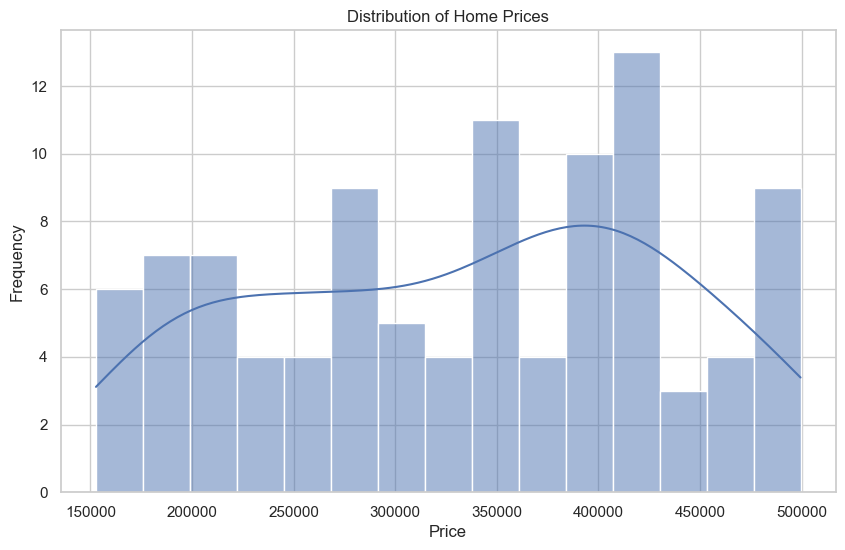

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=15, kde=True)
plt.title('Distribution of Home Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### Calculate Conditional Probabilities

In [6]:
total_houses = len(df)
houses_over_300k = len(df[df['Price'] > 300000])
houses_with_3_bedrooms = len(df[df['Bedrooms'] == 3])
houses_over_300k_and_3_bedrooms = len(df[(df['Price'] > 300000) & (df['Bedrooms'] == 3)])

# P(Price > 300k | Bedrooms = 3)
P_price_given_bedrooms = (houses_over_300k_and_3_bedrooms / houses_with_3_bedrooms) if houses_with_3_bedrooms > 0 else 0
P_price_given_bedrooms


0.4782608695652174

### Visualize Home Prices by Number of Bedrooms

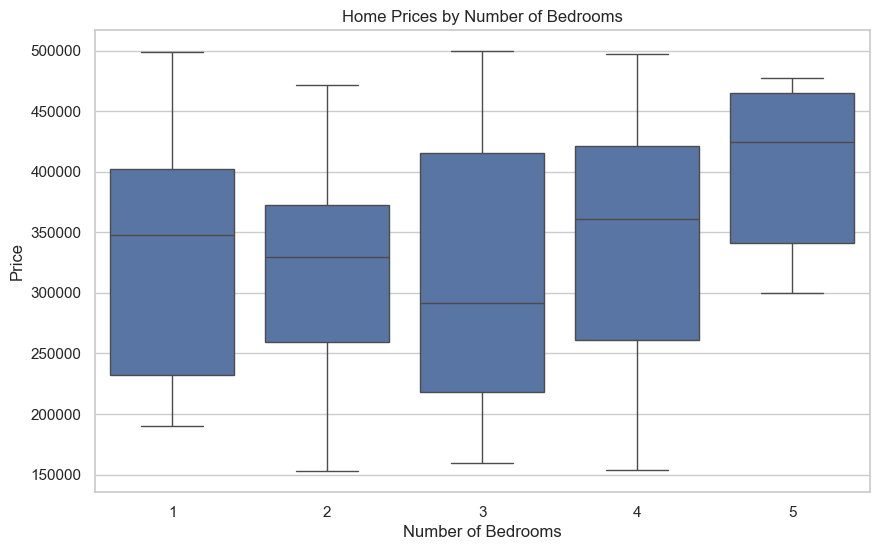

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Home Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


### Bayesian Update for a Specific Condition

In [9]:
houses_more_than_2_bathrooms = len(df[df['Bathrooms'] > 2])
houses_expensive_and_more_than_2_bathrooms = len(df[(df['Price'] > 300000) & (df['Bathrooms'] > 2)])

# P(Price > 300k | Bathrooms > 2)
P_expensive_given_bathrooms = (houses_expensive_and_more_than_2_bathrooms / houses_more_than_2_bathrooms) if houses_more_than_2_bathrooms > 0 else 0
P_expensive_given_bathrooms


0.6060606060606061

### Visualize Home Prices by Number of Bathrooms

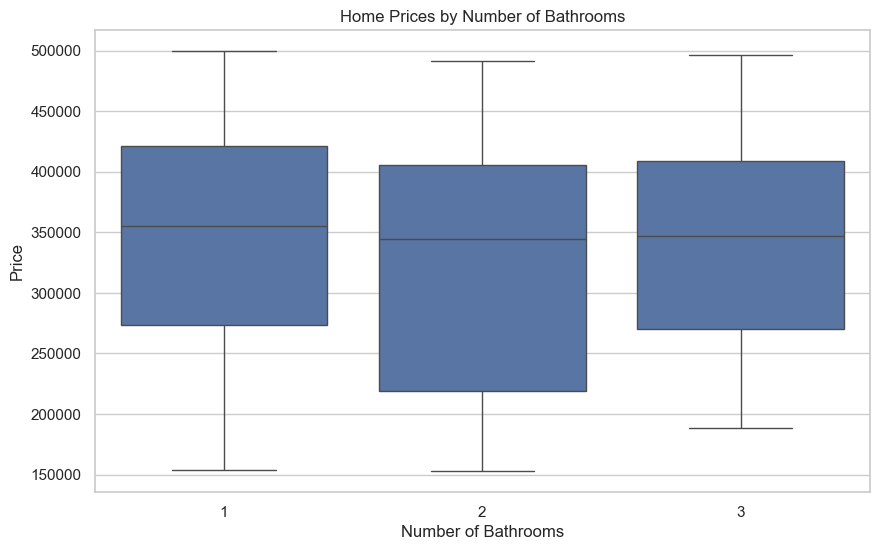

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bathrooms', y='Price', data=df)
plt.title('Home Prices by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()
